# <span style='background :#D6DBDF ' > **Stroke Prediction**

#### Agenda
1. Objective of this project
2. Import Data and Python Packages
3. Review Dataset and Data preparation
4. Exploratory Data Analysis (EDA)

## <font color="MidnightBlue">1. Objective of this project

> ML VS Keras ???

## <font color="MidnightBlue">2. Import Data and Python Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/anyamanee/stroke_prediction/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bm,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## <font color="MidnightBlue">3. Review Dataset and Data preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bm                 4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bm                   201
smoking_status         0
stroke                 0
dtype: int64

   > There are 201 missing values in 'bmi' column.<br>
   > We will consider the statistical value of bmi column to determine how to handle empty values.

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


> Because the average and mean values in the describe table are the same, we will deal with missing values in the 'bmi' column with mean.

In [6]:
df_mod = df
df_mod['bm'] = df_mod['bm'].fillna(df_mod['bm'].mean)
df_mod.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bm                   0
smoking_status       0
stroke               0
dtype: int64

> Now, There are now no missing values in the data set.<br>
> And, because the minimum age in describe table is less than one, then we will count the number of value less than one.

In [7]:
df_check = df_mod.age[df_mod.age <1]
print(f'number of rows where the age is less than one: {len(df_check)}')
print(f'% of rows where the age is less than one: {( len(df_check)/df_mod.shape[0] )*100:.2f}%')

number of rows where the age is less than one: 43
% of rows where the age is less than one: 0.84%


> Now We have 43 rows of value in 'age' column that less than one, which is only 0.84%.<br>
> So, we replaced that 43 rows with 1.

In [8]:
df_mod[df_mod['age'] < 1] = 1
df_mod.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36208.806067,43.230677,0.105871,0.062427,105.355998,0.057143
std,21333.486484,22.605002,0.307702,0.241952,46.214223,0.232138
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,17236.500000,25.000000,0.000000,0.000000,76.747500,0.000000
50%,36688.500000,45.000000,0.000000,0.000000,91.650000,0.000000
75%,54428.000000,61.000000,0.000000,0.000000,113.847500,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,1.000000


> Now that the data preparation is complete, move to the next step.

## <font color="MidnightBlue">4. Exploratory Data Analysis (EDA)

TypeError: '<=' not supported between instances of 'float' and 'method'

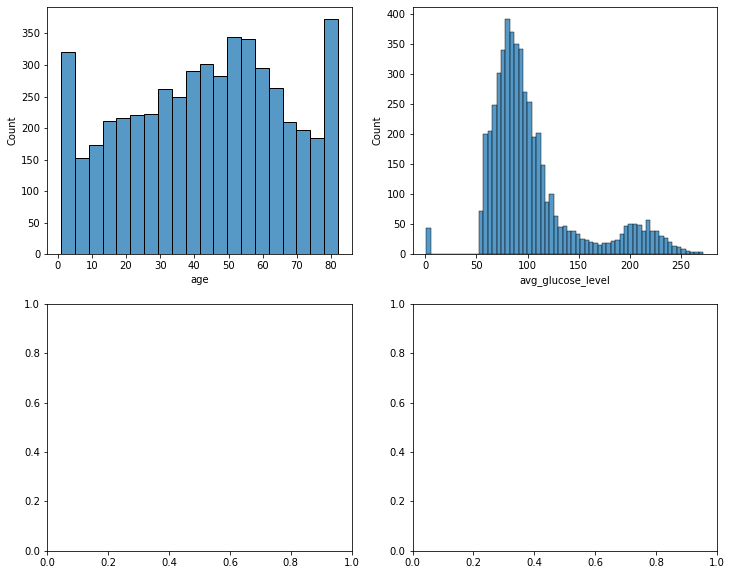

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(x='age',data = df_mod , ax=ax[0][0])
sns.histplot(x='avg_glucose_level',data = df_mod, ax=ax[0][1])
sns.histplot(x='bm',data = df_mod, ax=ax[1][0])
sns.histplot(x='hypertension',data = df_mod, ax=ax[1][1])


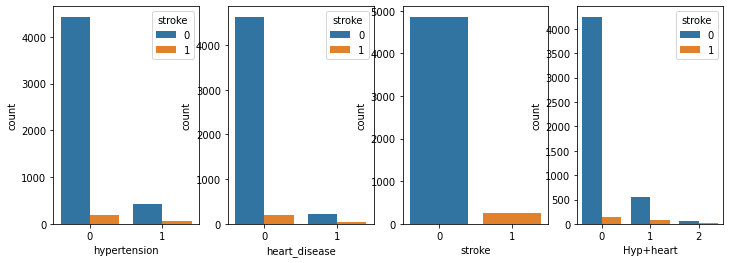

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(12, 4))
sns.countplot(x="hypertension",hue ="stroke",data = df_mod, ax=ax1)
sns.countplot(x="heart_disease",hue ="stroke", data = df_mod, ax=ax2)
sns.countplot(x="stroke",  data = df_mod, ax=ax3)
sns.countplot(x="Hyp+heart",hue ="stroke",data = df_mod, ax=ax4)

In [ ]:
df_mod['Hyp+heart'] = df_mod['hypertension'] + df_mod['heart_disease'] 

In [ ]:
# Data Encoding: 
#1. Categorical

#2. Label



In [ ]:
# Splitting the dataset into the Training set and Test set

In [ ]:
# Handling Imbalance data using SMOTE

In [ ]:
# Model Selection

In [ ]:
# Keras ANN

[1] https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy
[2] https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5
[3]https://www.kaggle.com/code/bhuvanchennoju/data-storytelling-auc-focus-on-strokes

## gender

## age

## hypertension

## heart_disease

## ever_married

## work_type

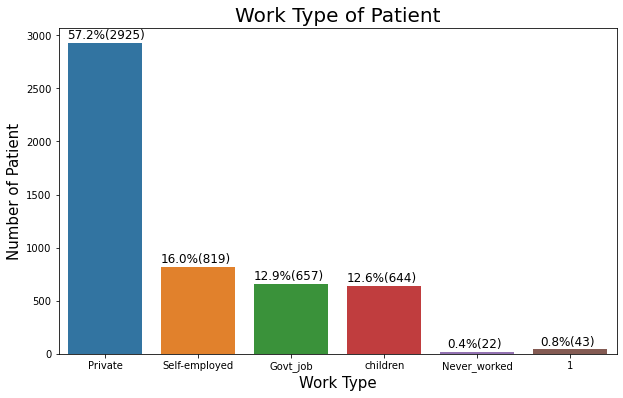

In [12]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='work_type', data=df_mod)

# define function for showing anotate
def plot_detail(ax1, feature):
    total = len(feature)
    for p in ax1.patches:
        value = '({:.0f})'.format(p.get_height())
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+0.05 + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()+40
        ax1.annotate(percentage, (x, y), size = 12, ha = 'right')
        ax1.annotate(value, (x,y), size = 12)

plot_detail(ax, df.work_type)


plt.xlabel("Work Type", size = 15)
plt.ylabel("Number of Patient", size = 15)
plt.title("Work Type of Patient", size = 20)
plt.show()

- ผู้ป่วยส่วนใหญ่กว่า 57.2% มี working type เป็น Private
- รองลงมาคือ Self-employed 16%, Government job 12.9% และ เป็นเด็ก 12.6%
- ในส่วนของผู้ป่วยที่ไม่ได้ทำงาน และ อื่นๆ มีจำนวนเพียงแค่ประมาณ 65คน

## Residence_type

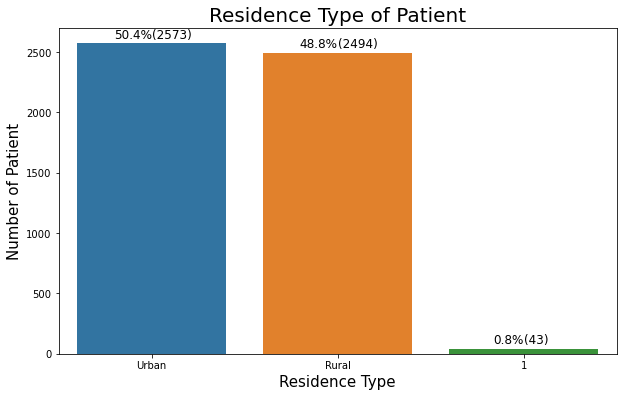

In [14]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='Residence_type', data=df_mod)
plot_detail(ax, df.Residence_type)


plt.xlabel("Residence Type", size = 15)
plt.ylabel("Number of Patient", size = 15)
plt.title("Residence Type of Patient", size = 20)
plt.show()

ในส่วนของประเภทที่อยู่อาศัยของผู้ป่วย หรือ Residence type นั้น แบ่งออกเป็น Urban และ Rural ในปริมาณค่อนข้างใกล้เคียงกัน

## avg_glucose_level

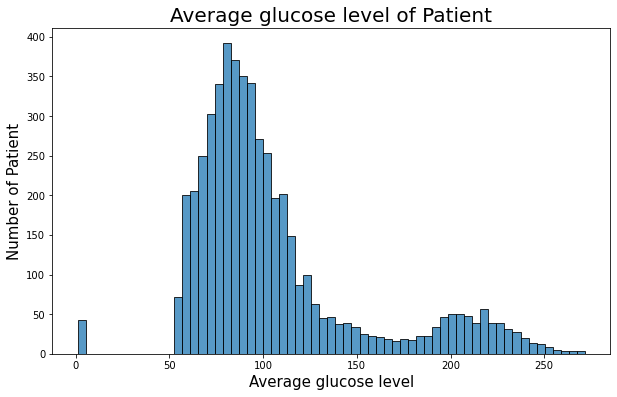

In [18]:
fig = plt.figure(figsize=(10,6))
ax = sns.histplot(x='avg_glucose_level', data=df_mod)



plt.xlabel("Average glucose level", size = 15)
plt.ylabel("Number of Patient", size = 15)
plt.title("Average glucose level of Patient", size = 20)
plt.show()

- จากข้อมูลระดับน้ำตาลในเลือดเฉลี่ยของผู้ป่วย การกระจายตัวจะมีลักษณะเป็น right skewed 
- ผู้ป่วยส่วนมากจะมีค่าระดับน้ำตาลในเลือดเฉลี่ยอยู่ในช่วงประมาณ 55 ถึง 130

## bm

## smoking_status

## stroke

hello
